<img src="excelrlogo.png"/>

### Assignment-05-Multiple Linear Regression

#### PROBLEM STATEMENTS - 50_Startups 

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [2]:
import pandas as pd
import numpy as np

In [4]:
F_startups = pd.read_csv("50_startups.csv")
F_startups

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [5]:
F_startups.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [6]:
F_startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
F_startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [14]:
New_startups = F_startups.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
New_startups

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [15]:
New_startups.head()

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [16]:
New_startups[New_startups.duplicated()]

,RDS,ADMS,MKTS,Profit


In [17]:
New_startups.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### CORRELATION 

Some graphs are really confuses us to understand what exactly relationship is going on. If we have measure to decide to know exactly then it will be clear for us.

corr = covarience(x, y)/SD(x).SD(y)

In [8]:
F_startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
import seaborn as sns

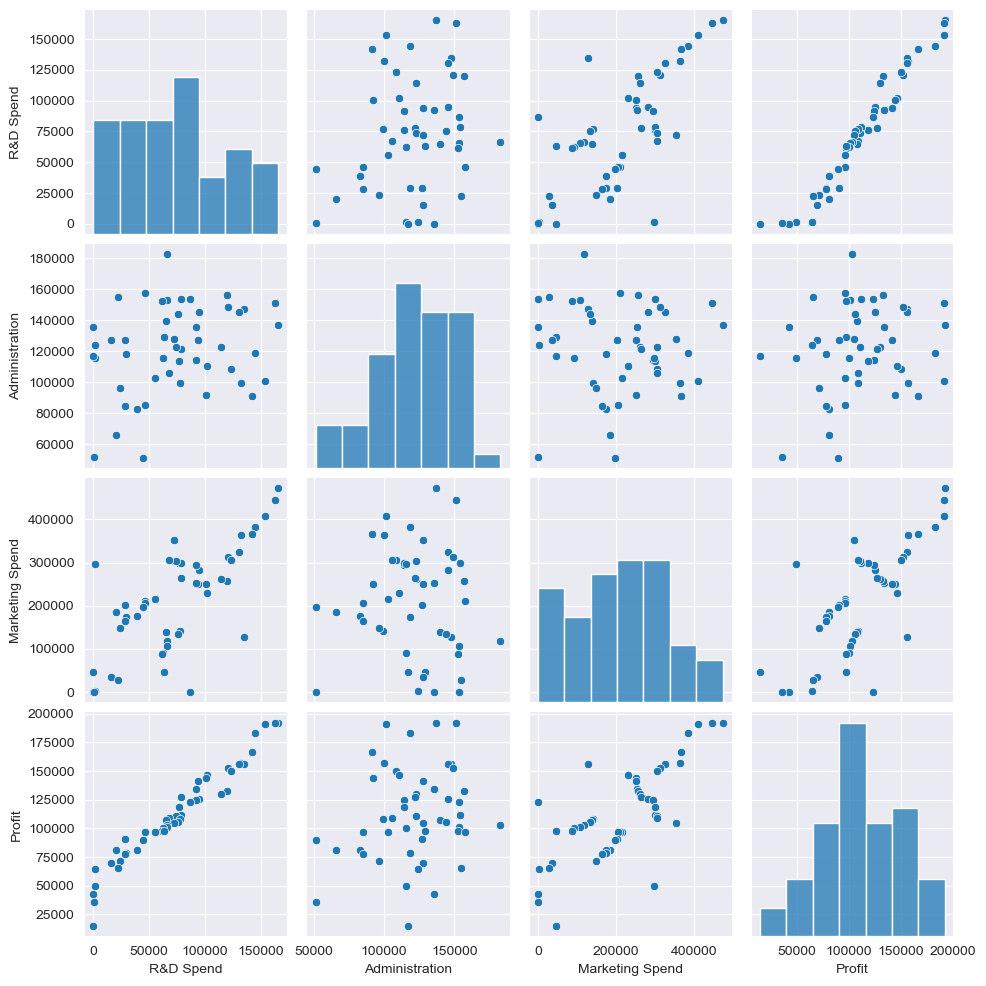

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(F_startups)

#### Model Building

In [25]:
import statsmodels.formula.api as smf
model_Build = smf.ols("Profit~RDS+ADMS+MKTS", data = New_startups).fit()

#### Model Testing

In [28]:
model_Build.params # It tell us coefficient Parameters value

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [35]:
model_Build.tvalues , np.round(model_Build.pvalues, 7)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.000000
 RDS          0.000000
 ADMS         0.601755
 MKTS         0.104717
 dtype: float64)

In [30]:
model_Build.rsquared , model_Build.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

#### Build Simple Linear Regression & Multiple Linear Regression Model

In [37]:
SLR_ADMS = smf.ols("Profit~ADMS", data = New_startups).fit()
SLR_ADMS.tvalues , SLR_ADMS.pvalues 

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [39]:
SLR_MKTS = smf.ols("Profit~MKTS", data = New_startups).fit()
SLR_MKTS.tvalues , SLR_MKTS.pvalues 

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [41]:
MLR_ADMS_MKTS = smf.ols("Profit~ADMS+MKTS", data = New_startups).fit()
MLR_ADMS_MKTS.tvalues , MLR_ADMS_MKTS.pvalues 

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

#### Model Validation

VIF = 1/(1-Rsquare)

#### Collinearity Check

In [44]:
rsq_RDS_ADMS_MKTS = smf.ols("RDS~ADMS+MKTS", data = New_startups).fit().rsquared
vif_RDS_ADMS_MKTS = 1/(1-rsq_RDS_ADMS_MKTS)

rsq_ADMS_RDS_MKTS =smf.ols("ADMS~RDS+MKTS", data = New_startups).fit().rsquared
vif_ADMS_RDS_MKTS = 1/(1-rsq_ADMS_RDS_MKTS)

rsq_MKTS_RDS_ADMS = smf.ols("MKTS~RDS+ADMS", data = New_startups).fit().rsquared
vif_MKTS_RDS_ADMS = 1/(1-rsq_MKTS_RDS_ADMS)

In [46]:
New ={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_RDS_ADMS_MKTS, vif_ADMS_RDS_MKTS, vif_MKTS_RDS_ADMS]}
Vif_df = pd.DataFrame(New)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


#### Residual Analysis

(Q-Q Plot)

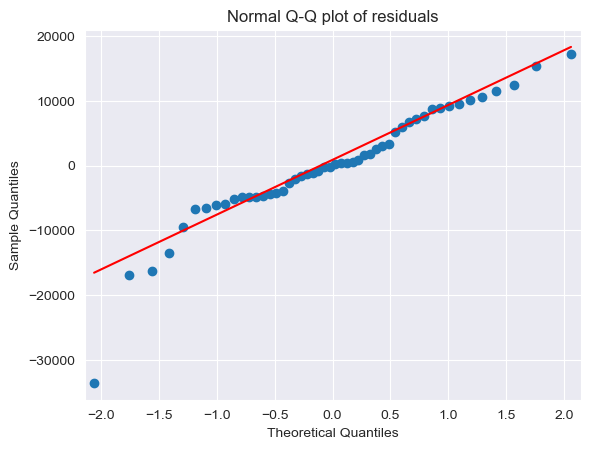

In [48]:
import matplotlib.pyplot as plt
sm.qqplot(model_Build.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [50]:
list(np.where(model_Build.resid<-30000))

[array([49], dtype=int64)]

#### Test for Homoscedasticity or Heteroscedasticity

z = (x - mu)/sigma

In [51]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

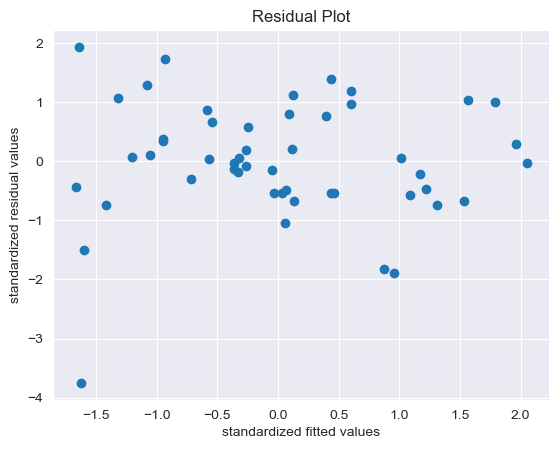

In [52]:
plt.scatter(standard_values(model_Build.fittedvalues),standard_values(model_Build.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

#### Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 

exog = x-variable & endog = y-variable

eval_env: 1


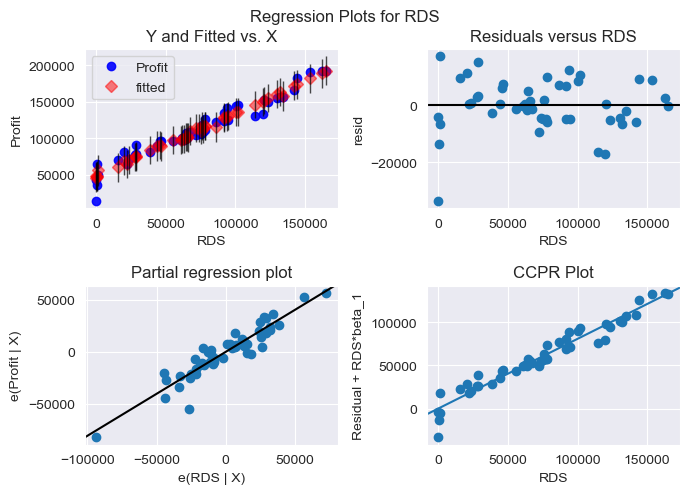

In [54]:
fig = plt.figure(figsize = (7, 5))
sm.graphics.plot_regress_exog(model_Build,'RDS', fig = fig)
plt.show()

eval_env: 1


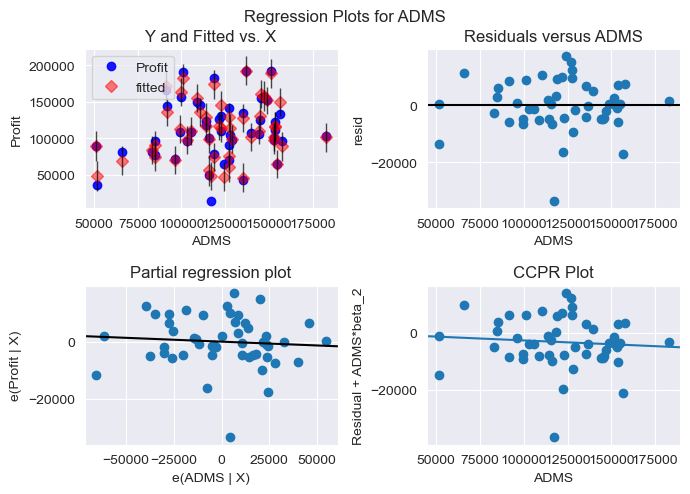

In [57]:
fig = plt.figure(figsize=(7, 5))
sm.graphics.plot_regress_exog(model_Build,'ADMS',fig = fig)
plt.show()

eval_env: 1


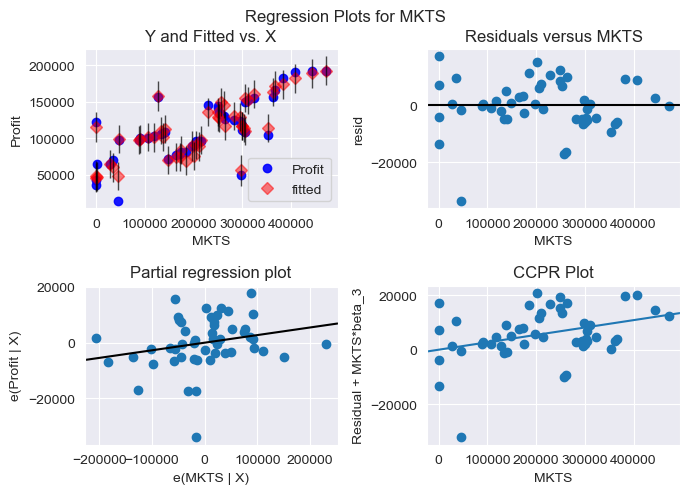

In [58]:
fig = plt.figure(figsize=(7, 5))
sm.graphics.plot_regress_exog(model_Build,'MKTS', fig = fig)
plt.show()

#### Model Deletion Diagnostics (checking Outliers or Influencers)

##### Cook's Distance

In [60]:
(c,_) = model_Build.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

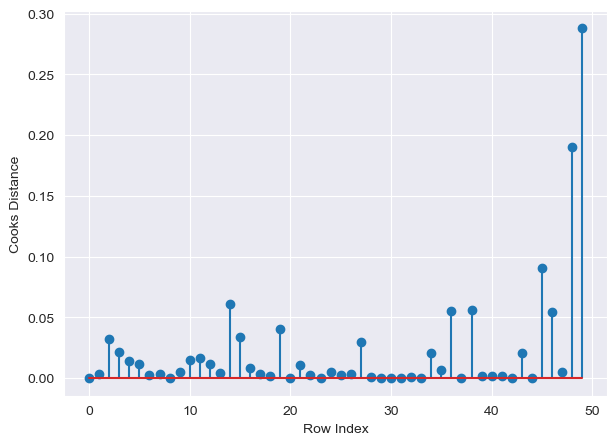

In [62]:
fig = plt.figure(figsize = (7, 5))
plt.stem(np.arange(len(New_startups)),np.round(c, 5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [63]:
np.argmax(c) , np.max(c)      # C>0.5

(49, 0.2880822927543267)

#### Leverage Value

Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

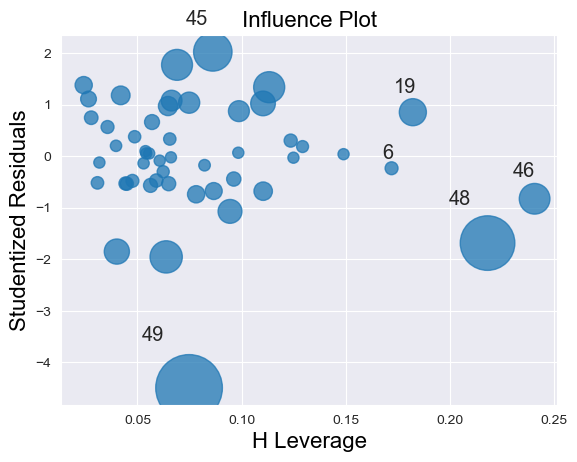

In [64]:
influence_plot(model_Build)
plt.show()

In [66]:
k = New_startups.shape[1]
n = New_startups.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [68]:
New_startups[New_startups.index.isin([49])] 

,RDS,ADMS,MKTS,Profit
49,0.0,116983.8,45173.06,14681.4


#### Model Developing

(reset_index(drop=True))

In [69]:
Old_startups = New_startups.drop(New_startups.index[[49]],axis=0).reset_index(drop=True)
Old_startups

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


#### Final Model

In [70]:
model_New = smf.ols("Profit~RDS+ADMS+MKTS",data= Old_startups).fit()

In [71]:
while model_New.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model_New = smf.ols("Profit~RDS+ADMS+MKTS",data = Old_startups).fit()
        (c,_) = model_New.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        Old_startups = Old_startups.drop(Old_startups.index[[np.argmax(c)]], axis = 0).reset_index(drop = True)
        Old_startups
    else:
        final_model = smf.ols("Profit~RDS+ADMS+MKTS", data = Old_startups).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918795
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [72]:
final_model.rsquared 

0.9882757054424702

In [73]:
Old_startups

,RDS,ADMS,MKTS,Profit
0,142107.34,91391.77,366168.42,166187.94
1,131876.90,99814.71,362861.36,156991.12
2,130298.13,145530.06,323876.68,155752.60
3,120542.52,148718.95,311613.29,152211.77
4,123334.88,108679.17,304981.62,149759.96
5,91992.39,135495.07,252664.93,134307.35
6,94657.16,145077.58,282574.31,125370.37
7,91749.16,114175.79,294919.57,124266.90
8,76253.86,113867.30,298664.47,118474.03
9,67532.53,105751.03,304768.73,108733.99


#### Model Predictions

In [76]:
pre_startups = pd.DataFrame({'RDS':80000,"ADMS":100000,"MKTS":150000},index=[0])
pre_startups

,RDS,ADMS,MKTS
0,80000,100000,150000


In [77]:
final_model.predict(pre_startups)

0    112523.740285
dtype: float64

In [78]:
pred_y = final_model.predict(Old_startups)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

#### Final Prepared Model

In [81]:
d2 = {'Prep_Models':['Model_Build','Final_Model'],'Rsquared':[model_Build.rsquared,final_model.rsquared]}
table = pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model_Build,0.950746
1,Final_Model,0.988276


#### Conclusion

This code involves data preparation, exploratory data analysis, model building, testing, validation, and improvement to create a predictive model for profit using multiple linear regression. It also includes diagnostics and checks for model assumptions and influential data points.